__to do:__ <br>
- create list of files using pandas (check w/ Karthik re: API)
- read in each file into memory (check)
- save merged into xarray object
- clip xarray object
- write to files?

In [25]:
# may need to install additional packages as we go
import os, glob
import rasterio as rio
from rasterio.io import MemoryFile
from rasterio.merge import merge
import xarray as xr
import rioxarray
from rioxarray.merge import merge_arrays
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Transformer
from pyproj import CRS

In [3]:
workdir = '/mnt/trappist-r0/kdevlin/work/'
dates = [os.path.basename(x) for x in glob.glob(workdir+'DSWE_INTSM/**')]
nd = len(dates)
# want to: create list of files using collections

In [5]:
workdir = '/mnt/trappist-r0/kdevlin/work/'
dates = [os.path.basename(x) for x in glob.glob(workdir+'DSWE_INTSM/**')]

In [ ]:
roi = {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -121.60835266113281,
              39.49874248613119
            ],
            [
              -121.26983642578124,
              39.49874248613119
            ],
            [
              -121.26983642578124,
              39.756824261131406
            ],
            [
              -121.60835266113281,
              39.756824261131406
            ],
            [
              -121.60835266113281,
              39.49874248613119
            ]
          ]
        ]
      }
    }['geometry']

In [20]:
filename = workdir+'DSWE_INTSM/'+dates[0]+'/crop_20210505_INTSM.tif'
with rio.open(filename) as ds:
    sar_bounds = ds.bounds
    crs = ds.crs

if crs != rio.crs.CRS.from_epsg(4326):
    transformer = Transformer.from_crs(crs.to_epsg(), 4326)
    ymin, xmin = transformer.transform(sar_bounds[0], sar_bounds[1])
    ymax, xmax = transformer.transform(sar_bounds[2], sar_bounds[3])
    bounds = [xmin, ymin, xmax, ymax]

In [28]:
crs

CRS.from_epsg(9473)

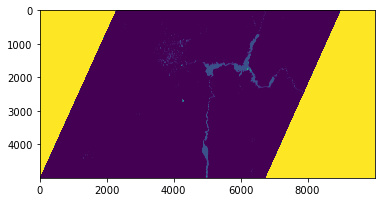

In [13]:
f1 = rioxarray.open_rasterio(workdir+'DSWE_INTSM/'+dates[0]+'/LC08_CU_005011_20210505_20210521_02_INTSM.TIF')
f2 = rioxarray.open_rasterio(workdir+'DSWE_INTSM/'+dates[0]+'/LC08_CU_006011_20210505_20210521_02_INTSM.TIF')
arrays = [f1,f2]
merged = merge_arrays(arrays)
plt.imshow(merged[0],vmin=0,vmax=4)